In [656]:
# library for numby pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.config', 'mymoviedb.csv', 'sample_data']

**Data Preprocessing**

In [657]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [658]:
df.info() #to identify data type and information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [659]:

df['Genre'].head()


,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [660]:
df.duplicated().sum() #no duplicated movies

np.int64(0)

In [661]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


constraints
1. To identify how many rows and columnn
2. To ensure no duplicacy of data
3. Release date is in object format to convert into date time format
4. Removal of unuseful data (overview,original language,poster url)
5. noticable outlier in POpularity
6. vote average to be categorized
7. genre column has comma seperated values and white sapce that needs to be handled and casted into  category.exploration summary


In [662]:
#3 solution Since we need to identify most frequent genre of movie released
#on netflix
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)
df.info()




datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [663]:
# prompt: convert the release in datetime format into only year

df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].head())
df.info()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [664]:
#remove umwanted columns
df.drop(['Overview','Original_Language','Poster_Url'],axis=1,inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorize the vote average into popular average not popular and below average
**Use cut when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, cut could convert ages to groups of
age ranges.**

In [665]:
def categorize(df, col, labels):
  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']
  ]
  df[col] = pd.cut(df[col], edges , labels=labels, duplicates='drop')
  return df

In [666]:
labels=['not_popular','below_average','average','popular']
categorize(df,'Vote_Average',labels)
df['Vote_Average'].unique()

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [667]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_average,2398


In [668]:
df.dropna(inplace= True) #removing duplicate values permanently
df.isna().sum()


,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


**Split genres into a list and then explode our dataframe to have ony one genre per row
no multivalued attribute**

In [669]:
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


***Casting column into category***

In [670]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes



CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [672]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,38


In [673]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


**Data Visualization**

In [674]:
sns.set_style('whitegrid')

Q What is the most frequent genre of movies released on netflix?

In [675]:
df['Genre'].describe()

,Genre
count,25552
unique,38
top,Thriller
freq,1960


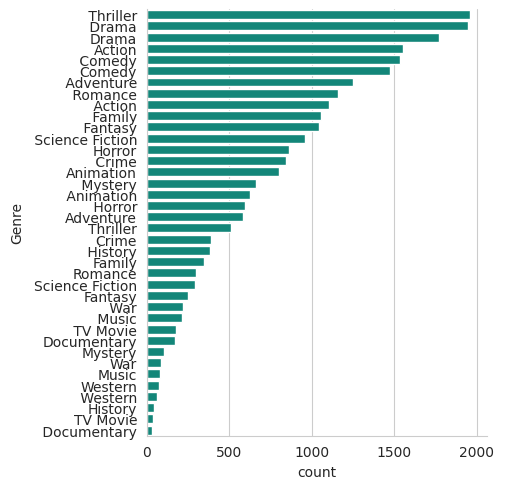

In [676]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#0986')
plt.show()


Q Which has the highest votes in vote average column?


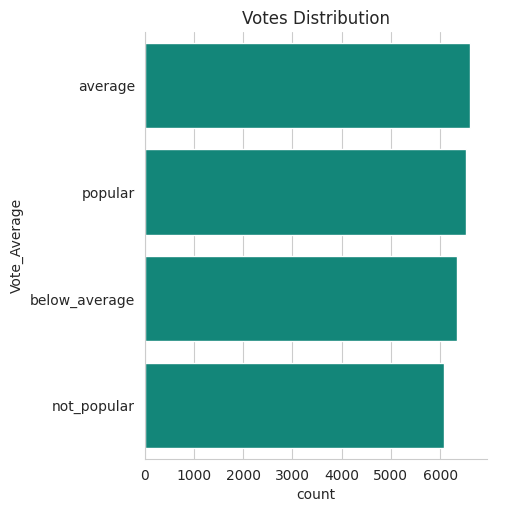

In [677]:
df.head()
df['Vote_Average'].value_counts()
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='#0986')
plt.title('Votes Distribution')
plt.show()

Q what movie got the highest popularity and whtas that genre?


In [678]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [679]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Q Lowest popularity and genre


In [680]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


Q which year has the most filmed movie?


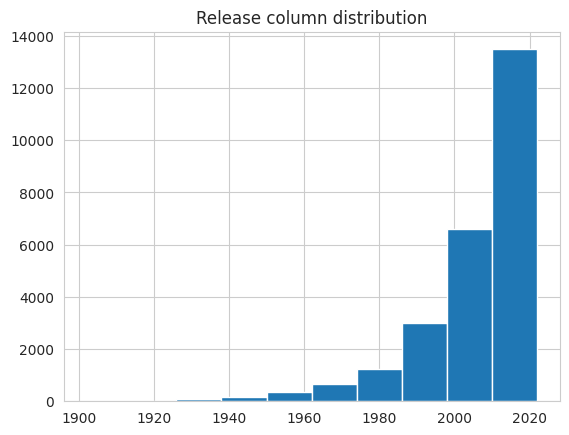

In [681]:
df['Release_Date'].hist()
plt.title('Release column distribution')
plt.show()